In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
tf.__version__


'2.3.0'

CUDA --> Nvidia

In [ ]:
keras.__version__

'2.4.0'

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

Note that we need to constrction our validation set

In [ ]:

x_valid, x_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
# on divise par 255 car image traité sont en échelle de gris ( 0 à 255)
# de faire ca : ca le normalise à un nombre entre 0 et 1 
# on veut nombre à la soirtie de la fonction d'activation entre 0 et 1 

In [ ]:

y_valid, y_train = y_train_full[:5000]/255.0, y_train_full[5000:]/255.0

In [ ]:
print(y_valid[0]) # chiffre correspond à une des classes à laquelles il va correspondre 

0.03529411764705882


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create the Neural Network


In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Input layer, Flatten is a function than transfomr a matrix
# (image) into a vector of features (line by line)
# Flatten regroupement image concaténées : transformer 28x28 en un vector de 724 entrées 


In [ ]:
model.add(keras.layers.Dense(300, activation="relu"))
# 300 neuronnes avec activation function qui est relu
# 1st hidden layer 

In [ ]:
model.add(keras.layers.Dense(100, activation="relu"))
# 2nd hidden layer 

In [ ]:
model.add(keras.layers.Dense(10, activation="softmax"))
# Class 10

We can do direclty all together 

In [ ]:
model = keras.models.Sequential(
    [
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation ="softmax")

    ]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# accéder aux paramètres du NN
model.layers

In [ ]:
model.layers[1]
# on accède au layer1 avec les poids 

In [ ]:
hidden1=model.layers[1]

In [ ]:
hidden1.get_weights()
# affiche les poids, à l'arrivée et à la sortie 
# les premiers poids vont êêtre modifiés petit à petit 

[array([[-0.02237698, -0.02835392, -0.04600323, ..., -0.03996794,
         -0.02222853,  0.06724738],
        [-0.04728534, -0.01055718,  0.02846205, ...,  0.02280378,
         -0.03860135,  0.02345134],
        [-0.01647861,  0.03547031, -0.00173636, ..., -0.04174687,
          0.01475912,  0.03691918],
        ...,
        [-0.05022736,  0.00408579, -0.04426664, ..., -0.07175599,
         -0.04893487, -0.04025815],
        [ 0.06265867, -0.0442063 , -0.0232531 , ...,  0.02397436,
          0.06791759, -0.03721724],
        [ 0.0560814 , -0.00109076,  0.03602145, ..., -0.05826365,
          0.06142382,  0.06358863]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

#Compile the NN



We need to indicate the : 
1. Loss function
2. Optimizer
3. Metrics ("precision/accuracy")


In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [ ]:
training = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0147 - accuracy: 0.1007 - val_loss: 0.0010 - val_accuracy: 0.0914
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 7.3051e-04 - accuracy: 0.1008 - val_loss: 4.8343e-04 - val_accuracy: 0.0914
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 4.0367e-04 - accuracy: 0.1008 - val_loss: 3.1392e-04 - val_accuracy: 0.0914
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 2.7689e-04 - accuracy: 0.1008 - val_loss: 2.3141e-04 - val_accuracy: 0.0914
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.0971e-04 - accuracy: 0.1008 - val_loss: 1.8274e-04 - val_accuracy: 0.0914
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6820e-04 - accuracy: 0.1008 - val_loss: 1.5070e-04 - val_accuracy: 0.0914
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4010e-04 - accurac

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 7468.7026 - accuracy: 0.1000


[7468.70263671875, 0.10000000149011612]

In [ ]:
X_new=X_test[:3]/255.

In [ ]:
y_probability = model.predict(X_new)

In [ ]:
print(y_probability)

[[1.0000000e+00 9.7291224e-11 4.3461477e-11 3.7217989e-11 7.6543681e-11
  1.2052231e-11 2.5043804e-11 3.0520642e-11 6.1172081e-11 5.6066467e-12]
 [1.0000000e+00 2.4566136e-24 1.2926292e-25 5.2104583e-25 1.7127699e-24
  2.5939660e-26 2.0296696e-25 5.9831703e-25 1.0067971e-24 8.4542069e-27]
 [1.0000000e+00 1.7837625e-13 3.9269206e-14 4.4445926e-14 1.7354168e-13
  1.6329801e-14 4.1500606e-14 5.0292032e-14 7.1514572e-14 7.9751023e-15]]


In [ ]:
model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0])

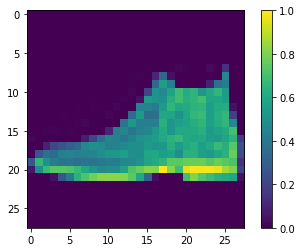

In [ ]:
plt.figure()
plt.imshow(X_new[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
class_names[0]

'T-shirt/top'

# Regression

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
houses = fetch_california_housing()

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(houses.data, houses.target)


In [ ]:
scaler = StandardScaler()

In [ ]:
x_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_valid = scaler.fit_transform(X_valid)


In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

# Neural net

https://www.tensorflow.org/api_docs/python/tf/keras/Model 

**Model** groups layers into an object with training and inference features. 

In [ ]:
model = keras.models.Sequential(
    [
     keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
     keras.layers.Dense(1) # only 1 output wanted so we put only 1 ouput neuron 
     # we want to predict only the price
    ]
)

Once the model is created, you can config the model with losses and metrics with model.compile(), train the model with model.fit(), or use the model to do prediction with model.predict().

**optimizer** : String (name of optimizer) or optimizer instance. 

loss **bold text** : Loss instance is used and reduction is set to NONE, return value has the shape [batch_size, d0, .. dN-1] ie. per-sample or per-timestep loss values; otherwise, it is a scalar. If the model has multiple outputs, you can use a different loss on each output by passing a dictionary or a list of losses. The loss value that will be minimized by the model will then be the sum of all individual losses. 

https://www.tensorflow.org/api_docs/python/tf/keras/Model 


In [ ]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam"
)

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 8.3297


8.329715728759766

In [ ]:
X_test[:2]

array([[ 0.81361135, -0.92677477,  0.01075281, -0.12138578, -0.01870895,
        -0.03665968, -0.82224862,  0.86154113],
       [-1.14372457, -1.40120303, -0.78935324, -0.12607029, -0.4322874 ,
        -0.07650466, -1.42017387,  1.26666983]])

In [ ]:
y_test[:2]

array([1.903, 1.417])

In [ ]:
model.predict(X_test[:2])

array([[-0.0274593],
       [ 0.3688117]], dtype=float32)

In [ ]:
model.predict(X_test[:2])

array([[-0.0274593],
       [ 0.3688117]], dtype=float32)